### k nearest neighbors
* Indentify the data point that separated into several classes to predict the classification of new data point or samples point
* It is lazy algorithm, memories the process
* classify new point based on similarity measure. used eculident distance


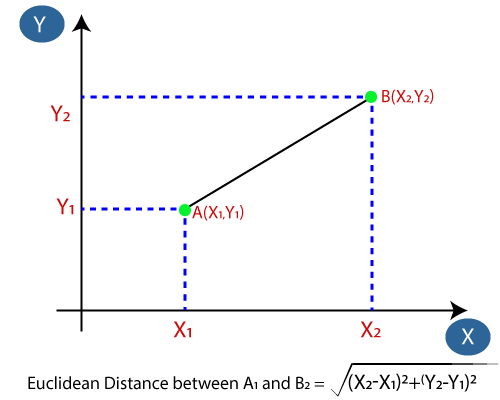

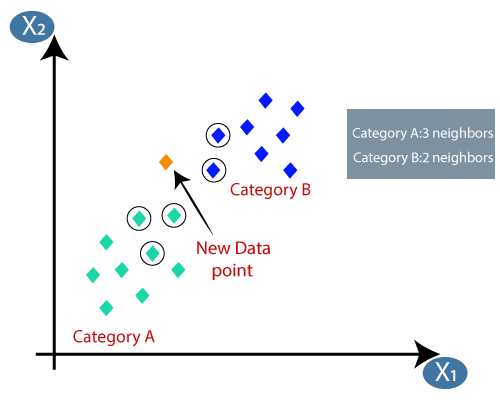

finding the nearest neighborig point from the data 
and k must be the odd number
# Algorithm
* load data 
* Initailized the K- value , k must be the odd number
* For each sample in the training data.
    * calculate the distance between query point and the cluster point
    * add the distace and their index of example to an ordered collection
* sort the distance ordered collection of distance and index from smaller to larger
* get the labels of selected k entries
  * If Regression problem :- Return mean
  * If cassification problem :- return mode

# Application of KNN
* classification:-
    * Image recommandation, text classification, sentiment analysis 
* Regression:- 
    * predict The continuous values, Housing prices prediction, and age group prediction
* Anomaly detection:-
    * KNN identify the outlier's between the data, it's easly remove the anomalies between the multiple columns in the dataset
* Recommendation system:-
    *  KNN can be used in collaborative filtering-based recommender systems. By finding similar users or items based on their preferences, KNN can suggest relevant items or users to a given user.

* Advantages of KNN Algorithm:
    * It is simple to implement.
    * It is robust to the noisy training data
    * It can be more effective if the training data is large.
* Disadvantages of KNN Algorithm:
  * Always needs to determine the value of K which may be complex some time.
  * The computation cost is high because of calculating the distance between the data points for all    the training samples

In [1]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('/kaggle/input/user-datacsv/User_Data.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Fitting K-NN classifier to the Training data:
* Now we will fit the K-NN classifier to the training data. To do this we will import the 
#### `KNeighborsClassifier` class of `Sklearn Neighbors` library. After importing the class, we will create the `Classifier` object of the class. The Parameter of this class will be
* n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
* metric='minkowski': This is the default parameter and it decides the distance between the points.
* p=2: It is equivalent to the standard Euclidean metric.
And then we will fit the classifier to the training data. Below is the code for it:

In [2]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [3]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [4]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [5]:
cm

array([[64,  4],
       [ 3, 29]])

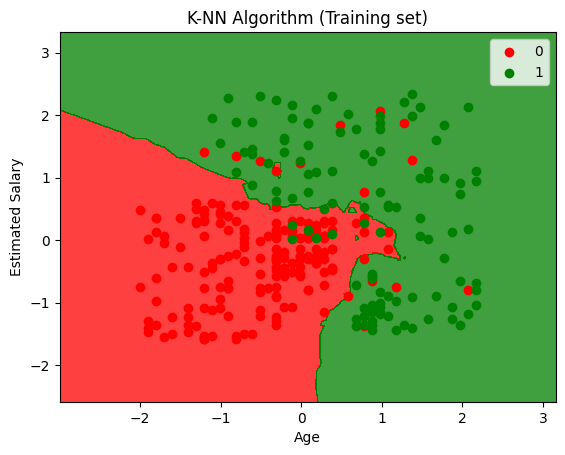

In [6]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  